# Exploratory Data Analysis

In [49]:
import pandas as pd
import numpy as np
import altair as alt

In [50]:
alt.renderers.enable('mimetype')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Load Data

In [51]:
ORD = pd.read_csv('../data/ORD.csv', index_col='Unnamed: 0')
ORD_train = ORD[ORD['year'] < 2018]

In [52]:
ORD_train.head(5)

,year,month,day,hour,rides,tmpf,dwpf,relh,sknt,p01i,vsby,feel,skyc,seats,airline
0,2013,1,1,0,22,24.98,17.96,74.290000,9.000000,0.0,9.000000,14.780000,3.000000,547.520724,3.0
1,2013,1,1,1,9,24.89,17.78,73.995000,9.000000,0.0,8.000000,14.670000,5.000000,147.962430,1.0
2,2013,1,1,2,11,21.20,14.00,73.320000,10.000000,0.0,9.000000,9.420000,5.000000,NaN,NaN
3,2013,1,1,3,3,21.14,12.14,67.723333,10.666667,0.0,9.666667,8.976667,4.333333,NaN,NaN
4,2013,1,1,4,5,19.94,10.94,67.580000,10.000000,0.0,10.000000,7.840000,5.000000,847.150186,4.0


### Add Lagged Data

In [53]:
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols})

In [54]:
lag = 3
ORD_train_lag = lag_df(ORD_train, lag=lag, cols=['seats'])
#ORD_train_lag = lag_df(ORD_train, lag=lag, cols=ORD_train.columns.tolist())

In [55]:
ORD_train_lag.head(5)

,year,month,day,hour,rides,tmpf,dwpf,relh,sknt,p01i,vsby,feel,skyc,seats,airline,seats-1,seats-2,seats-3
0,2013,1,1,0,22,24.98,17.96,74.290000,9.000000,0.0,9.000000,14.780000,3.000000,547.520724,3.0,NaN,NaN,NaN
1,2013,1,1,1,9,24.89,17.78,73.995000,9.000000,0.0,8.000000,14.670000,5.000000,147.962430,1.0,547.520724,NaN,NaN
2,2013,1,1,2,11,21.20,14.00,73.320000,10.000000,0.0,9.000000,9.420000,5.000000,NaN,NaN,147.962430,547.520724,NaN
3,2013,1,1,3,3,21.14,12.14,67.723333,10.666667,0.0,9.666667,8.976667,4.333333,NaN,NaN,NaN,147.962430,547.520724
4,2013,1,1,4,5,19.94,10.94,67.580000,10.000000,0.0,10.000000,7.840000,5.000000,847.150186,4.0,NaN,NaN,147.962430


### Correlations

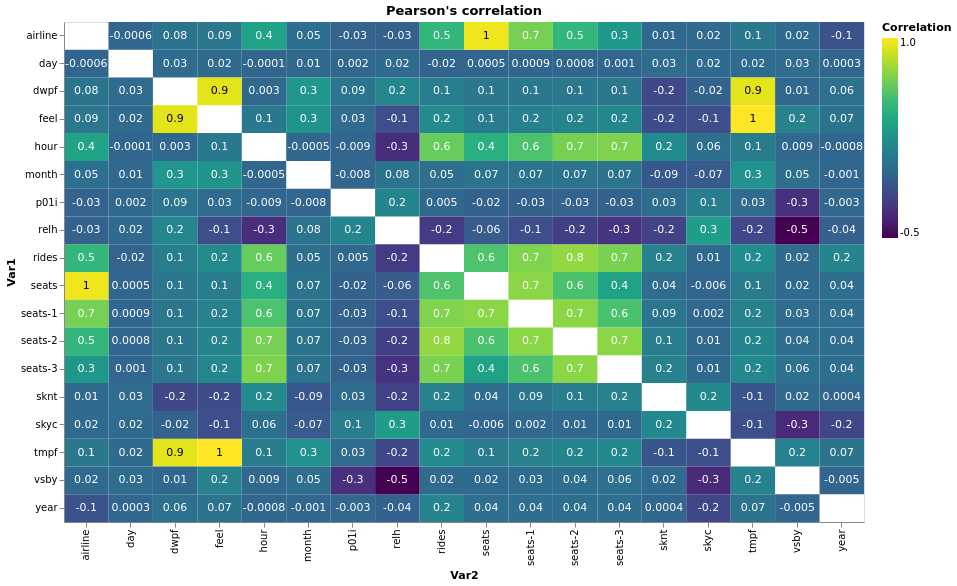

In [56]:
ORD_corr = ORD_train_lag.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
ORD_corr = ORD_corr[ORD_corr.Correlation != 1]

base = alt.Chart(ORD_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.1'),
    color=alt.condition(
        alt.datum.Correlation >= 0.90,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 800,
    height = 500,
    title = "Pearson's correlation"
)

### Charts

#### Seats and Rides

In [95]:
p1 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('hour:N', title = "Hour"),
    y = alt.Y('mean(seats):Q', title = "Average Seat Count"),
    color = alt.Color('year:N', title = "Year")
).properties(
    height = 300,
    width = 400,
    title = "Seats vs Hour"
)

p2 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('month:N', title = "Month"),
    y = alt.Y('mean(seats):Q', title = "Average Seat Count"),
    color = alt.Color('year:N', title = "Year")
).properties(
    height = 300,
    width = 400,
    title = "Seats vs Month"
)

p3 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('year:N', title = "Year"),
    y = alt.Y('mean(seats):Q', title = "Average Seat Count")
).properties(
    height = 300,
    width = 400,
    title = "Seats vs Year"
)

In [96]:
p4 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('hour:N', title = "Hour"),
    y = alt.Y('mean(rides):Q', title = "Average Rides"),
    color = alt.Color('year:N', title = "Year")
).properties(
    height = 300,
    width = 400,
    title = "Rides vs Hour"
)

p5 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('month:N', title = "Month"),
    y = alt.Y('mean(rides):Q', title = "Average Rides"),
    color = alt.Color('year:N', title = "Year")
).properties(
    height = 300,
    width = 400,
    title = "Rides vs Month"
)

p6 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('year:N', title = "Year"),
    y = alt.Y('mean(rides):Q', title = "Average Rides"),
).properties(
    height = 300,
    width = 400,
    title = "Rides vs Year"
)

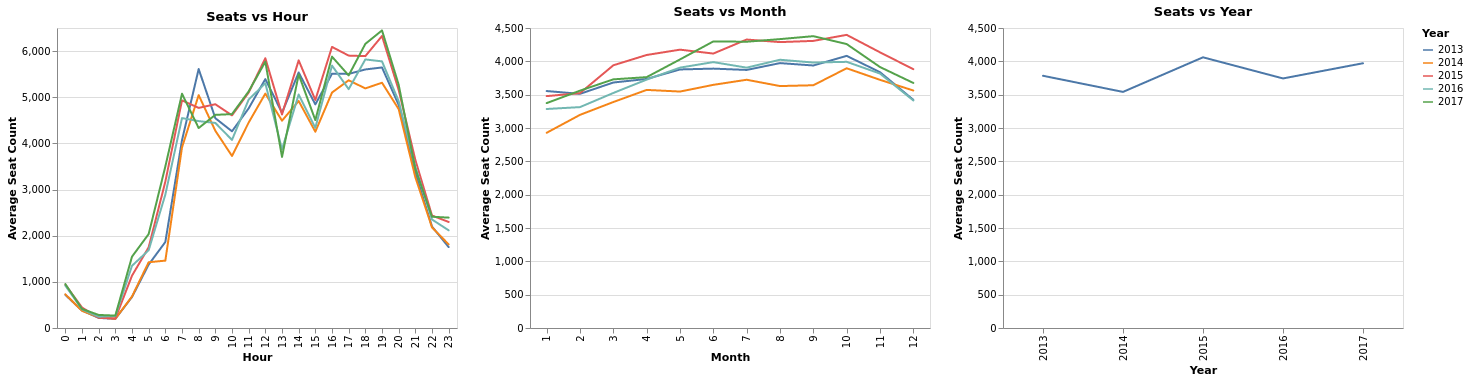

In [97]:
p1 | p2 | p3

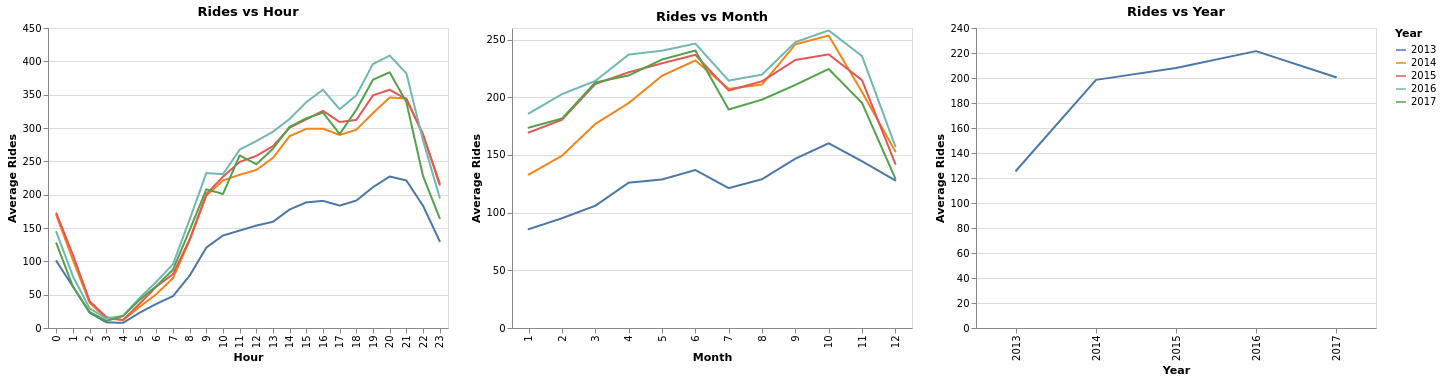

In [98]:
p4 | p5 | p6

In [138]:
p7 = alt.Chart(ORD_train_lag.melt(id_vars=['year', 'month', 'day', 'hour', 'rides', 'tmpf', 'dwpf', 'relh', 'sknt', 'p01i', 'vsby', 'feel', 'skyc', 'airline'])).mark_line().encode(
    x = alt.X('value:Q', bin=alt.Bin(extent=[0, 10000], step=250), title="Average seats in an Hour"),
    y = alt.Y('mean(rides):Q', title="Average Rides in an Hour"),
    color = alt.Color("variable:N")
)

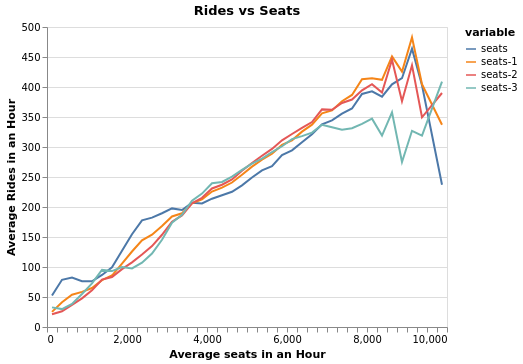

In [139]:
(p7).properties(
    title = "Rides vs Seats"
)

#### Weather

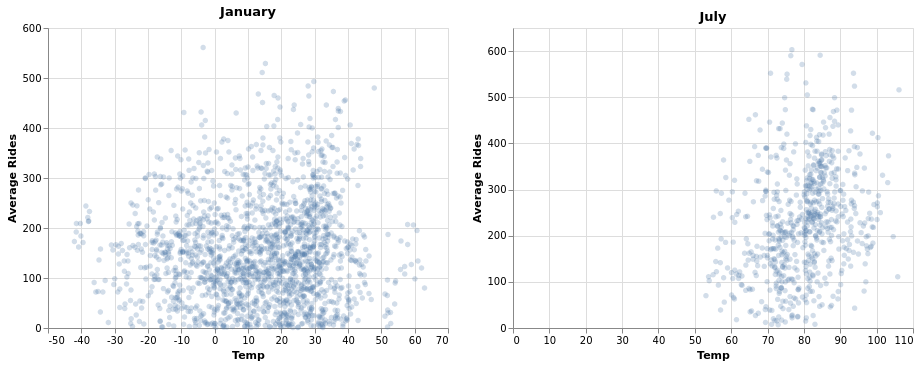

In [149]:
p8 = alt.Chart(ORD_train.query('month == 1')).mark_circle(opacity=0.25).encode(
    x = alt.X('feel:Q', title = "Temp"),
    y = alt.Y('mean(rides):Q', title = "Average Rides")
).properties(
    title = "January"
)


p9 = alt.Chart(ORD_train.query('month == 7')).mark_circle(opacity=0.25).encode(
    x = alt.X('feel:Q', title = "Temp"),
    y = alt.Y('mean(rides):Q', title = "Average Rides")
).properties(
    title = "July"
)

p8 | p9

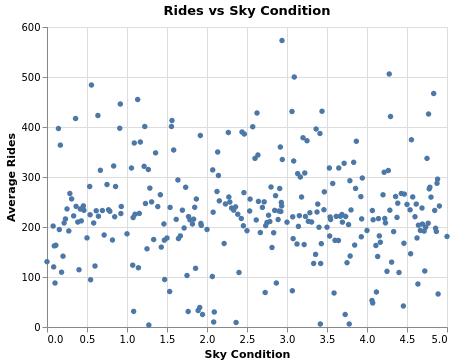

In [156]:
alt.Chart(ORD_train).mark_circle().encode(
    x = alt.X('skyc:Q', title = "Sky Condition"),
    y = alt.Y('mean(rides):Q', title = "Average Rides")
).properties(
    title = "Rides vs Sky Condition"
)